 # The Spark Foundation - Task2
 
 # Name Payal Atre
 
 
# From the given ‘Iris’ dataset, predict the optimum number of clusters 
# and represent it visually. 

# Required R packages

In [1]:
#ggpubr: creates publication ready plots.
#factoextra: Extract and Visualize the Results of Multivariate Data Analyses

library("ggpubr")
library("factoextra")
library("animation")

Warning message:
"package 'ggpubr' was built under R version 4.0.5"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
Warning message:
"package 'factoextra' was built under R version 4.0.5"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message:
"package 'animation' was built under R version 4.0.5"


# Data preparation

In [5]:
data("iris")
df <- iris
head(df, 3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [2]:
kmeans.ani(df[1:4], 3)

ERROR: Error in df[1:4]: object of type 'closure' is not subsettable


# K-means clustering calculation 

1) Removing the 5th column (Species) and scale the data to make variables comparable
2) Calculate k-means clustering using k = 3. As the final result of k-means clustering result is sensitive to the random starting assignments, we specify nstart = 25. This means that R will try 25 different random starting assignments and then select the best results.

In [6]:
# Compute k-means with k = 3
set.seed(123)
res.km <- kmeans(scale(df[, -5]), 3, nstart = 25)
# K-means clusters showing the group of each individuals
res.km$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2
 [75] 2 3 3 3 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 3 3 3 3 3 3 2 2 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

# Plot k-means

# Using the factoextra R package


The function fviz_cluster() [factoextra package] can be used to easily visualize k-means clusters. It takes k-means results and the original data as arguments. In the resulting plot, observations are represented by points, using principal components if the number of variables is greater than 2. It’s also possible to draw concentration ellipse around each cluster.

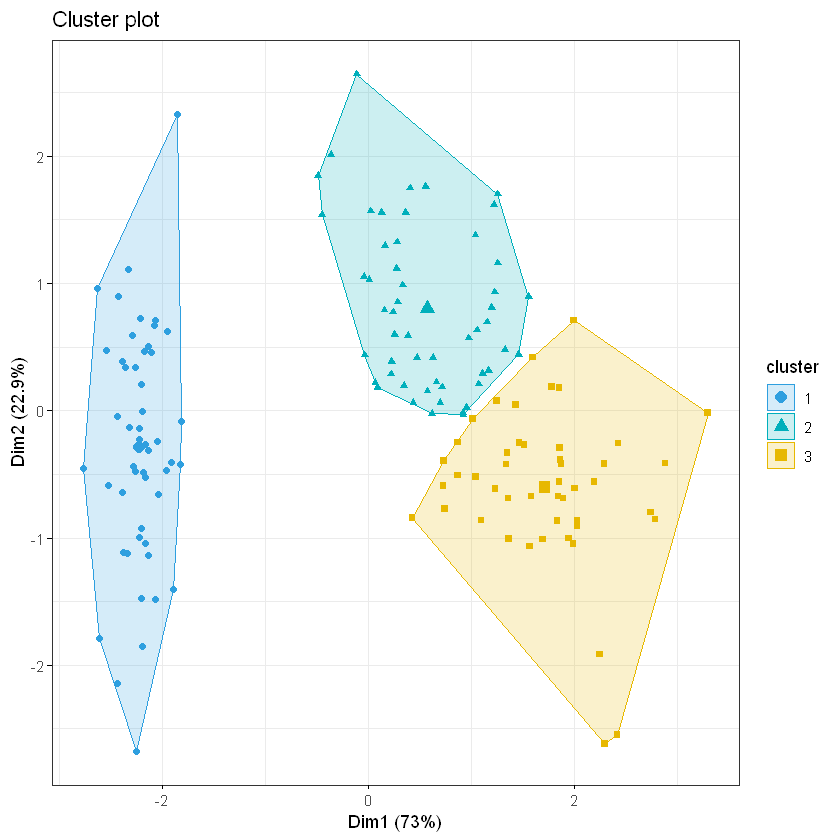

In [7]:
fviz_cluster(res.km, data = df[, -5],
             palette = c("#2E9FDF", "#00AFBB", "#E7B800"), 
             geom = "point",
             ellipse.type = "convex", 
             ggtheme = theme_bw()
             )

Using the ggpubr R package
If you want to adapt the k-means clustering plot, you can follow the steps below:

Compute principal component analysis (PCA) to reduce the data into small dimensions for visualization
Use the ggscatter() R function [in ggpubr] or ggplot2 function to visualize the clusters

# Compute PCA and extract individual coordinates

In [12]:
# Dimension reduction using PCA
res.pca <- prcomp(df[, -5],  scale = TRUE)
# Coordinates of individuals
ind.coord <- as.data.frame(get_pca_ind(res.pca)$coord)
# Add clusters obtained using the K-means algorithm
ind.coord$cluster <- factor(res.km$cluster)
# Add Species groups from the original data set
ind.coord$Species <- df$Species
# Data inspection
head(ind.coord)

,Dim.1,Dim.2,Dim.3,Dim.4,cluster,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,-2.257141,-0.4784238,0.12727962,0.024087508,1,setosa
2,-2.074013,0.6718827,0.23382552,0.102662845,1,setosa
3,-2.356335,0.3407664,-0.04405390,0.028282305,1,setosa
4,-2.291707,0.5953999,-0.09098530,-0.065735340,1,setosa
5,-2.381863,-0.6446757,-0.01568565,-0.035802870,1,setosa
6,-2.068701,-1.4842053,-0.02687825,0.006586116,1,setosa


In [13]:
# Percentage of variance explained by dimensions
eigenvalue <- round(get_eigenvalue(res.pca), 1)
variance.percent <- eigenvalue$variance.percent
head(eigenvalue)

,eigenvalue,variance.percent,cumulative.variance.percent
,<dbl>,<dbl>,<dbl>
Dim.1,2.9,73.0,73.0
Dim.2,0.9,22.9,95.8
Dim.3,0.1,3.7,99.5
Dim.4,0.0,0.5,100.0


# Visualize k-means clusters
1) Color individuals according to the cluster groups
2) Change point shapes according to the Species groups (ground truth of grouping)
3) Add concentration ellipses
4) Add cluster centroid using the stat_mean() [ggpubr] R function

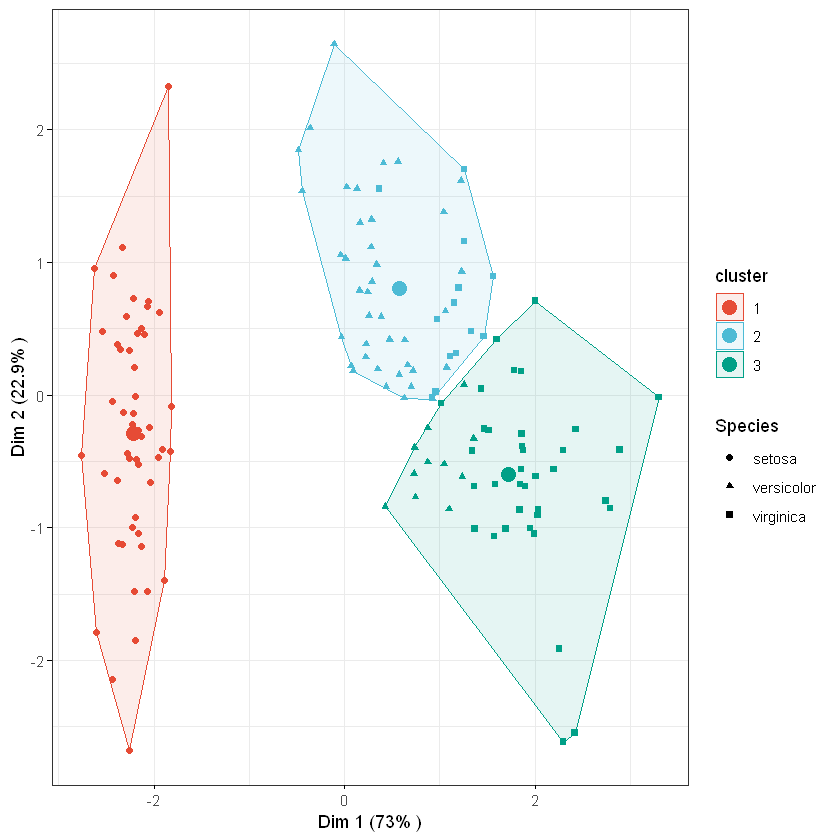

In [14]:
ggscatter(
  ind.coord, x = "Dim.1", y = "Dim.2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "Species", size = 1.5,  legend = "right", ggtheme = theme_bw(),
  xlab = paste0("Dim 1 (", variance.percent[1], "% )" ),
  ylab = paste0("Dim 2 (", variance.percent[2], "% )" )
) +
  stat_mean(aes(color = cluster), size = 4)

## I was able to successfully carry-out prediction using Unsupervised Machine Learning task